### What is Exploratory Data Analysis?

* it helps to answer questions for Data scientists:  
    1. How to ensure you are ready to use machine learning algorithms in a project?
    2. How to choose the most suitable algorithms for your data set?
    3. How to define the feature variables that can potentially be used for machine learning?
    
    
* For data engineer and data analysts:
    1. Does my data clean enough?
    2. What kind of report we can build for this data


### EDA 的一般步骤

1. Import the data

2. Get a feel of the data ,describe the data,look at a sample of data like first and last rows

3. Take a deeper look into the data by querying or indexing the data

4. Identify features of interest

5. Recognise the challenges posed by data - missing values, outliers

6. Discover patterns in the data

### Key Concepts of Exploratory Data Analysis

* 2 types of Data Analysis

    * Confirmatory Data Analysis  验证性数据分析

    * Exploratory Data Analysis  探索性数据分析

* 4 Objectives of EDA

    * Discover Patterns

    * Spot Anomalies

    * Frame Hypothesis

    * Check Assumptions

* 2 methods for exploration

    * Univariate Analysis 单一变量

    * Bivariate Analysis  双变量

* Stuff done during EDA

    * Trends  发展趋势

    * Distribution 分布

    * Mean  平均值

    * Median  中位数

    * Outlier  离群值

    * Spread measurement (SD)  点差测量

    * Correlations  相关性

    * Hypothesis testing  假设检验

    * Visual Exploration  可视化


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

conda install -c conda-forge missingno

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

### Read Data

In [2]:
train = pd.read_csv('./Files/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./Files/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [9]:
# check two datasets
train.shape , test.shape

((1460, 81), (1459, 80))

Let us examine numerical features in the train dataset

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
numeric_features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

#### Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days.

In [13]:
# list of variables that contain year information
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
# Let us explore the contents of temporal  variables
for feature in year_feature:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

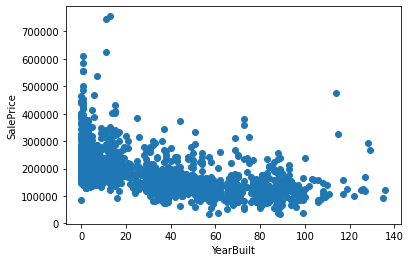

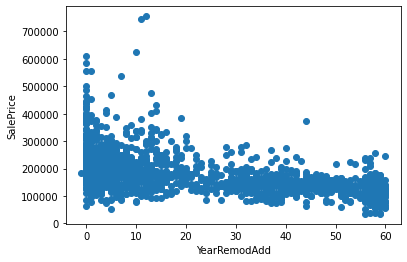

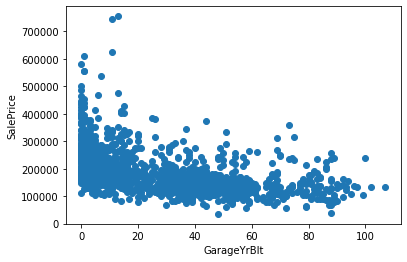

In [15]:
for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

#### Numerical variables Types

1. Discrete Variables
离散变量
离散变量是在任意两个值之间具有可计数的值的数值变量。离散变量始终为数值变量。例如，客户投诉数量或者瑕疵或缺陷数。

In [19]:
for feature in numeric_features:
    print('for feature: {a}, len is {b}'.format(a=feature,b=len(train[feature].unique())))

for feature: Id, len is 1460
for feature: MSSubClass, len is 15
for feature: LotFrontage, len is 111
for feature: LotArea, len is 1073
for feature: OverallQual, len is 10
for feature: OverallCond, len is 9
for feature: YearBuilt, len is 112
for feature: YearRemodAdd, len is 61
for feature: MasVnrArea, len is 328
for feature: BsmtFinSF1, len is 637
for feature: BsmtFinSF2, len is 144
for feature: BsmtUnfSF, len is 780
for feature: TotalBsmtSF, len is 721
for feature: 1stFlrSF, len is 753
for feature: 2ndFlrSF, len is 417
for feature: LowQualFinSF, len is 24
for feature: GrLivArea, len is 861
for feature: BsmtFullBath, len is 4
for feature: BsmtHalfBath, len is 3
for feature: FullBath, len is 4
for feature: HalfBath, len is 3
for feature: BedroomAbvGr, len is 8
for feature: KitchenAbvGr, len is 4
for feature: TotRmsAbvGrd, len is 12
for feature: Fireplaces, len is 4
for feature: GarageYrBlt, len is 98
for feature: GarageCars, len is 5
for feature: GarageArea, len is 441
for feature: Wood

In [20]:
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [21]:
train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

Now let us find the relationship between these discrete features and Sale Price

平均数：需要全组所有数据来计算；易受数据中极端数值的影响。中位数：仅需把数据按顺序排列后即可确定；不易受数据中极端数值的影响。

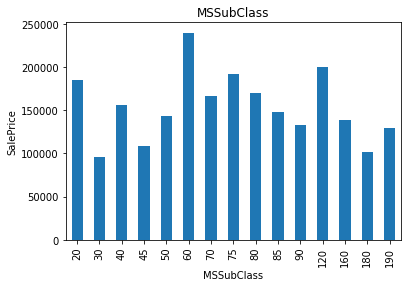

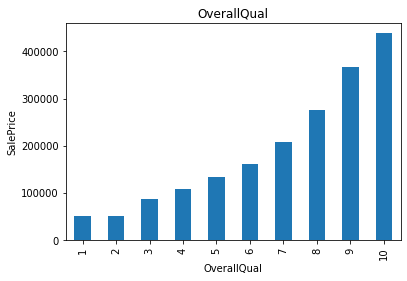

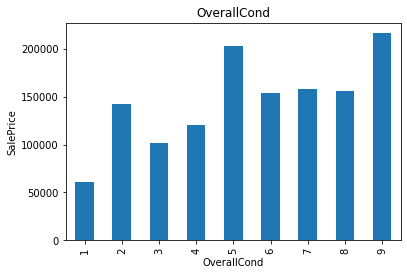

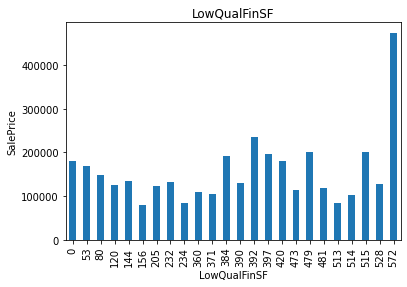

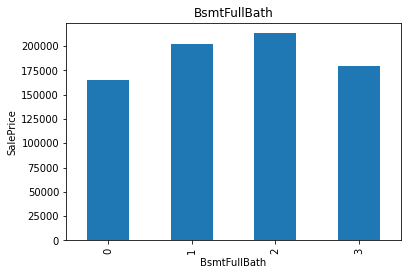

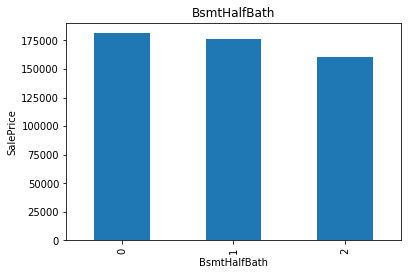

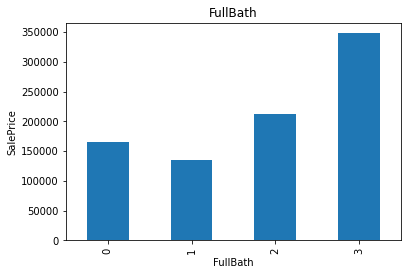

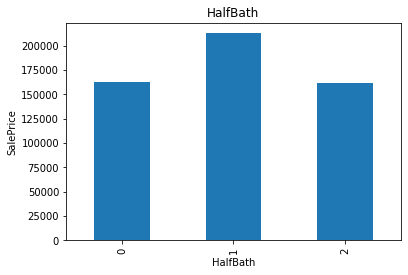

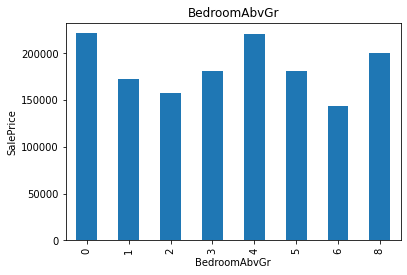

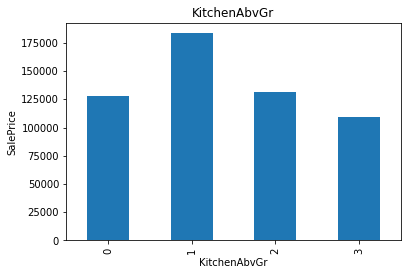

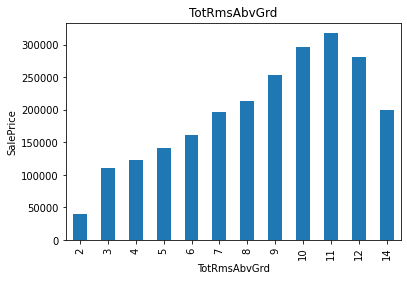

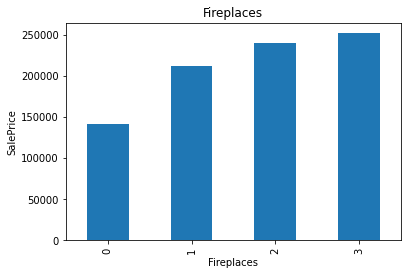

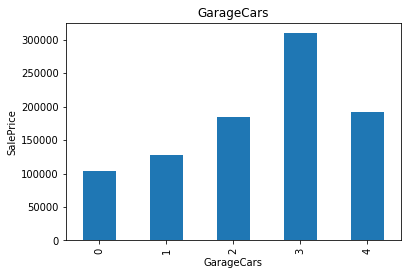

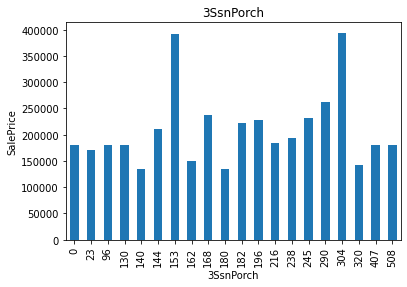

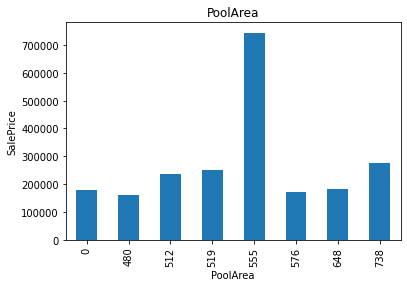

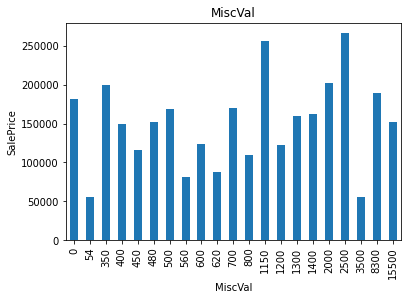

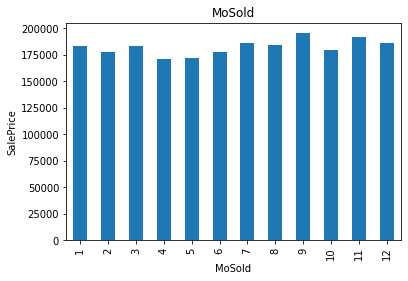

In [25]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

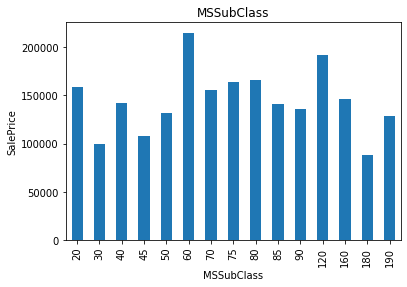

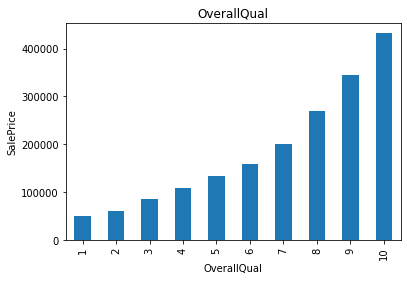

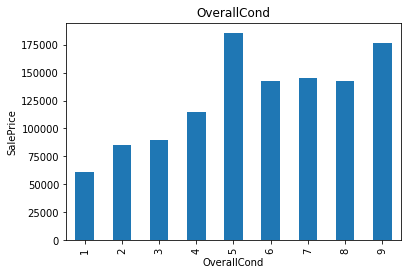

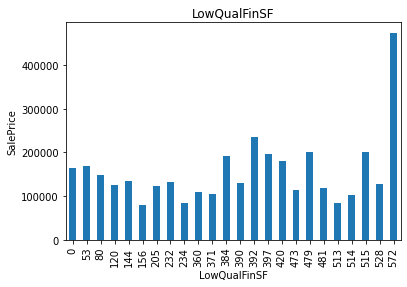

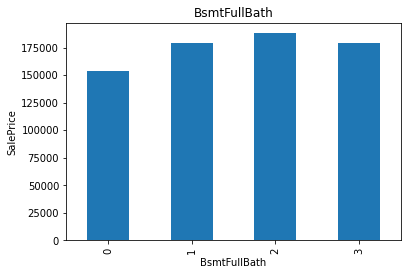

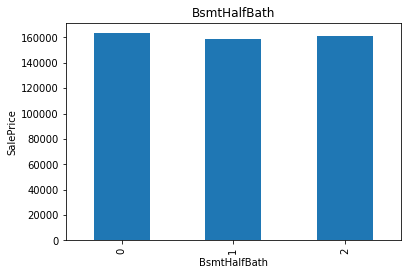

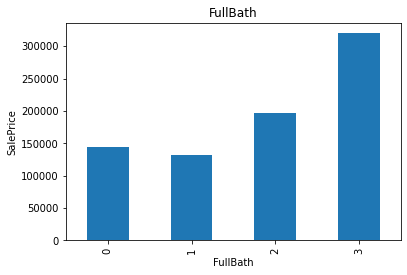

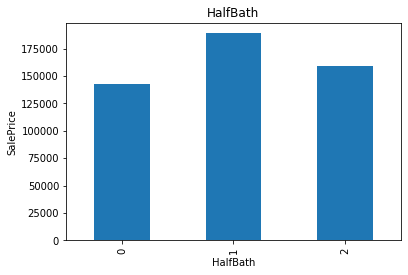

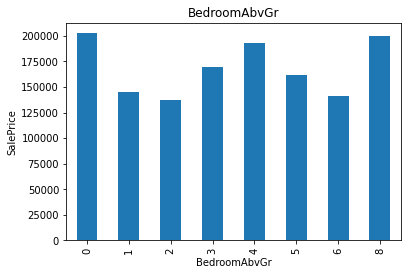

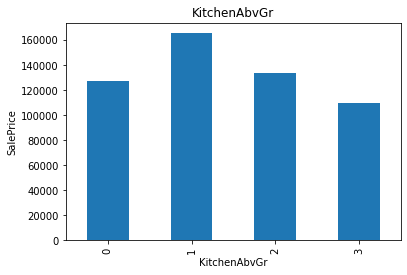

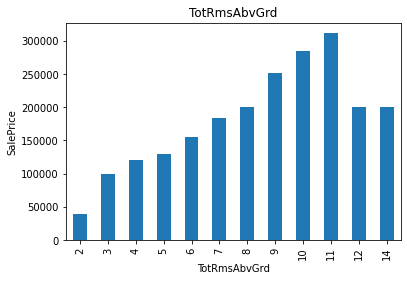

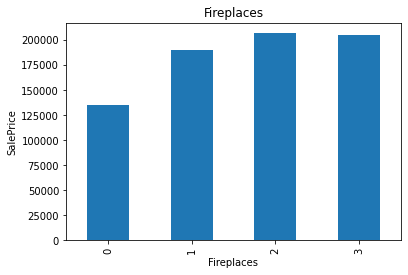

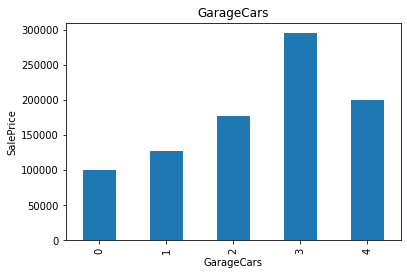

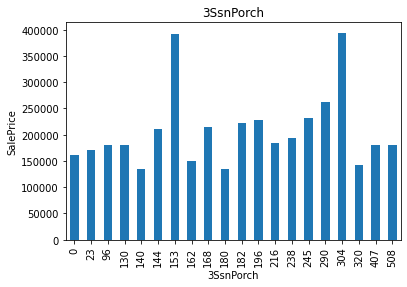

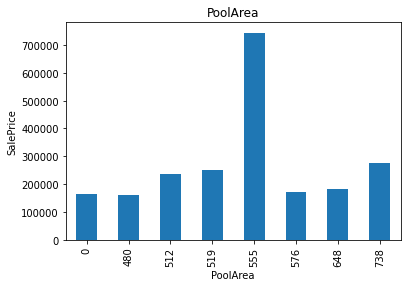

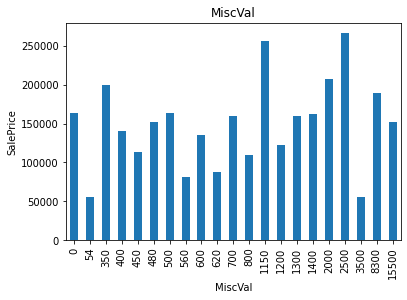

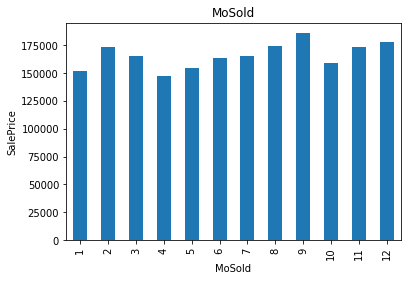

In [22]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### 2. Continuous Variables:

连续变量是在任意两个值之间具有无限个值的数值变量。连续变量可以是数值变量，也可以是日期/时间变量。例如，零件的长度，或者收到付款的日期和时间。

In [26]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous Feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

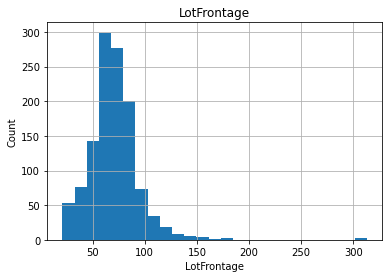

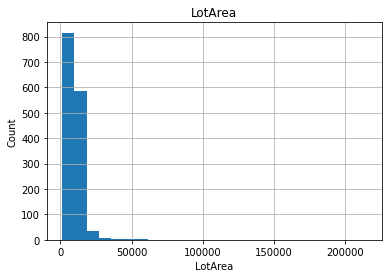

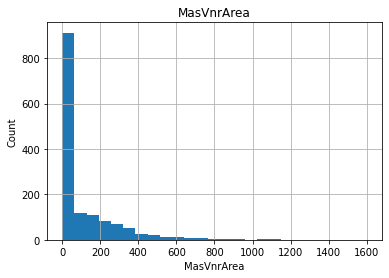

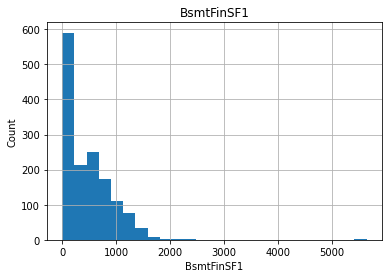

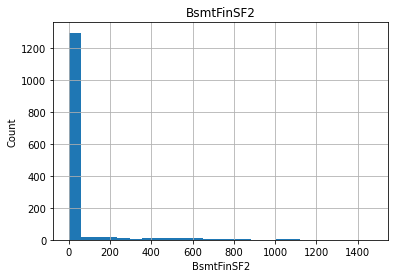

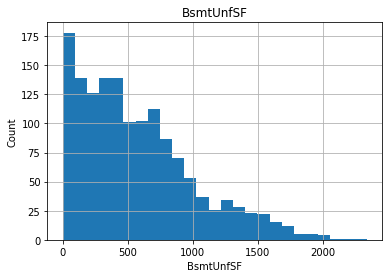

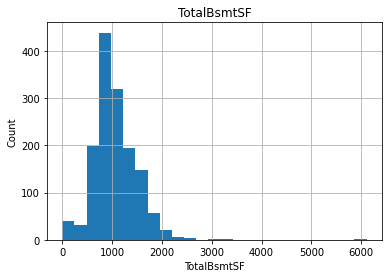

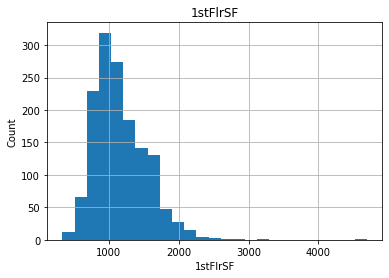

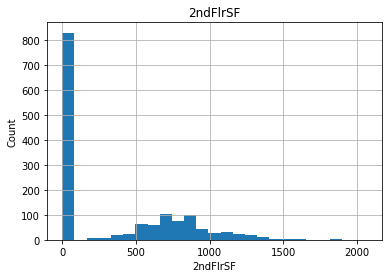

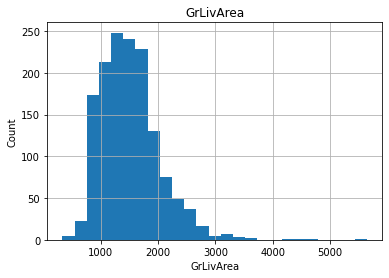

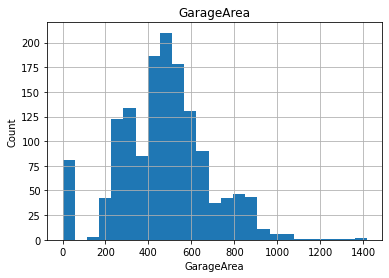

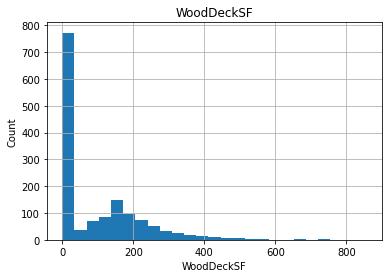

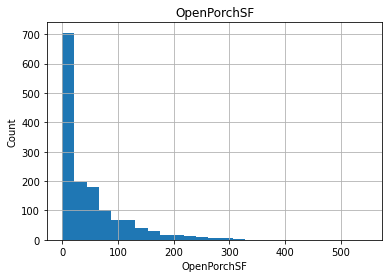

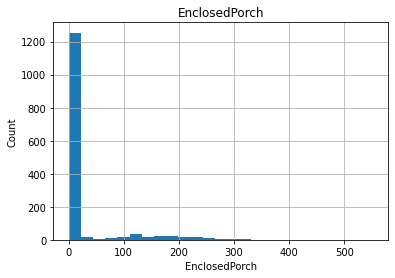

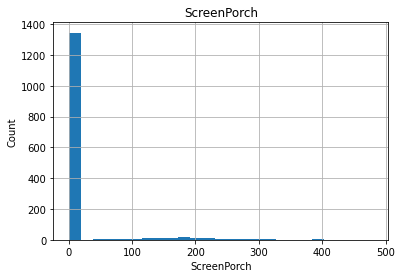

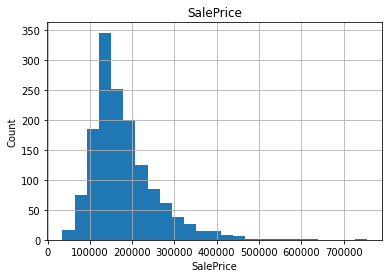

In [27]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Let us examine categorical features in the train dataset

无效矩阵的数据密集显示  

我们可以一目了然的看到每个变量的缺失情况，

变量id数据是完整的，其他变量都有不同程度的缺失，

尤其是alley, Fence等的缺失非常严重

In [28]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:>

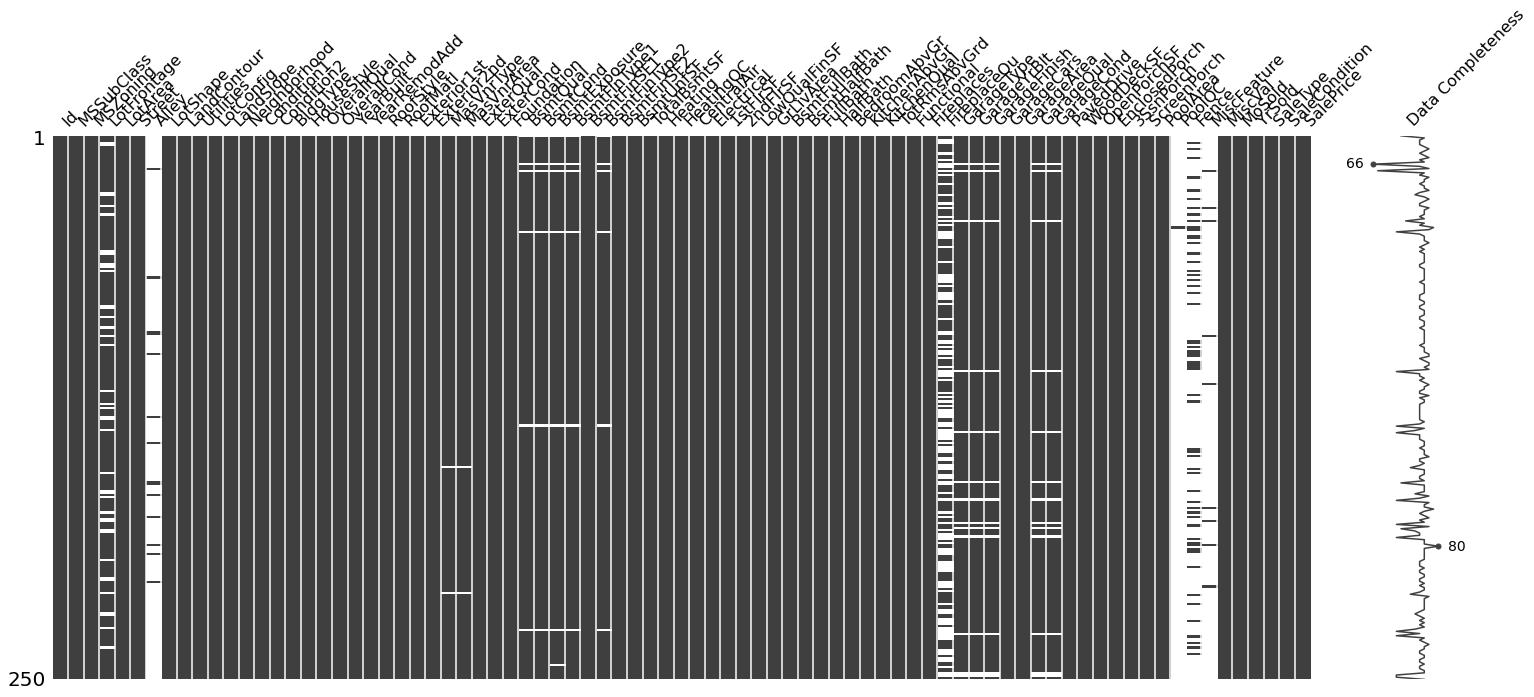

In [29]:
msno.matrix(train.sample(250), labels=True)

In [30]:
##缺失值
empty_column = []
for e, c in enumerate(train.columns):
    if sum(pd.isnull(train[c]))!=0:
        empty_column.append(c)
        print("feature_no:%d \t feature_name:%s \t null_num:%d \t null_rate: %.2f%%"% (e, c , sum(pd.isnull(train[c])), 100*sum(train[c].isnull())/len(train[c])))

feature_no:3 	 feature_name:LotFrontage 	 null_num:259 	 null_rate: 17.74%
feature_no:6 	 feature_name:Alley 	 null_num:1369 	 null_rate: 93.77%
feature_no:25 	 feature_name:MasVnrType 	 null_num:8 	 null_rate: 0.55%
feature_no:26 	 feature_name:MasVnrArea 	 null_num:8 	 null_rate: 0.55%
feature_no:30 	 feature_name:BsmtQual 	 null_num:37 	 null_rate: 2.53%
feature_no:31 	 feature_name:BsmtCond 	 null_num:37 	 null_rate: 2.53%
feature_no:32 	 feature_name:BsmtExposure 	 null_num:38 	 null_rate: 2.60%
feature_no:33 	 feature_name:BsmtFinType1 	 null_num:37 	 null_rate: 2.53%
feature_no:35 	 feature_name:BsmtFinType2 	 null_num:38 	 null_rate: 2.60%
feature_no:42 	 feature_name:Electrical 	 null_num:1 	 null_rate: 0.07%
feature_no:57 	 feature_name:FireplaceQu 	 null_num:690 	 null_rate: 47.26%
feature_no:58 	 feature_name:GarageType 	 null_num:81 	 null_rate: 5.55%
feature_no:59 	 feature_name:GarageYrBlt 	 null_num:81 	 null_rate: 5.55%
feature_no:60 	 feature_name:GarageFinish 	 null_

### Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

我们看到MasVnrArea与MasVnrType的缺失相关性为1，说明MasVnrArea只要发生了缺失，那么MasVnrType也会缺失，

若X和Y的相关性为-1，说明X缺失的值，那么Y没有缺失；而X没有缺失时，Y为缺失

<AxesSubplot:>

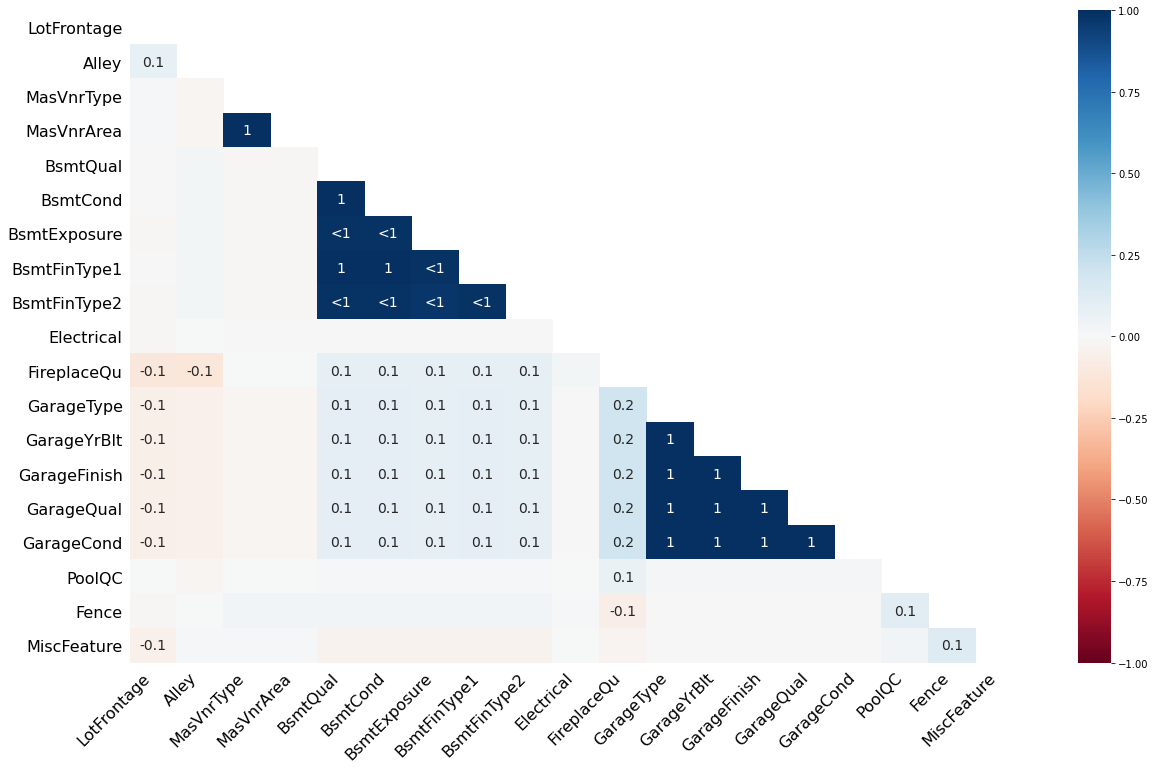

In [31]:
msno.heatmap(train)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

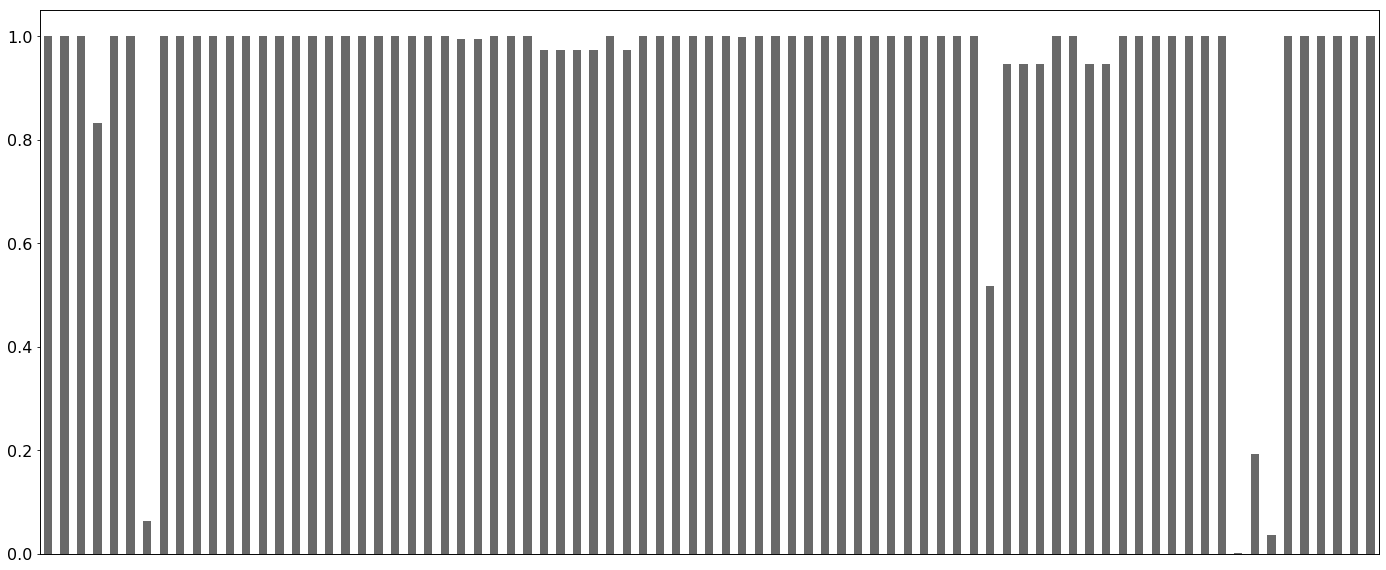

In [34]:
msno.bar(train.sample(1000))

#### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

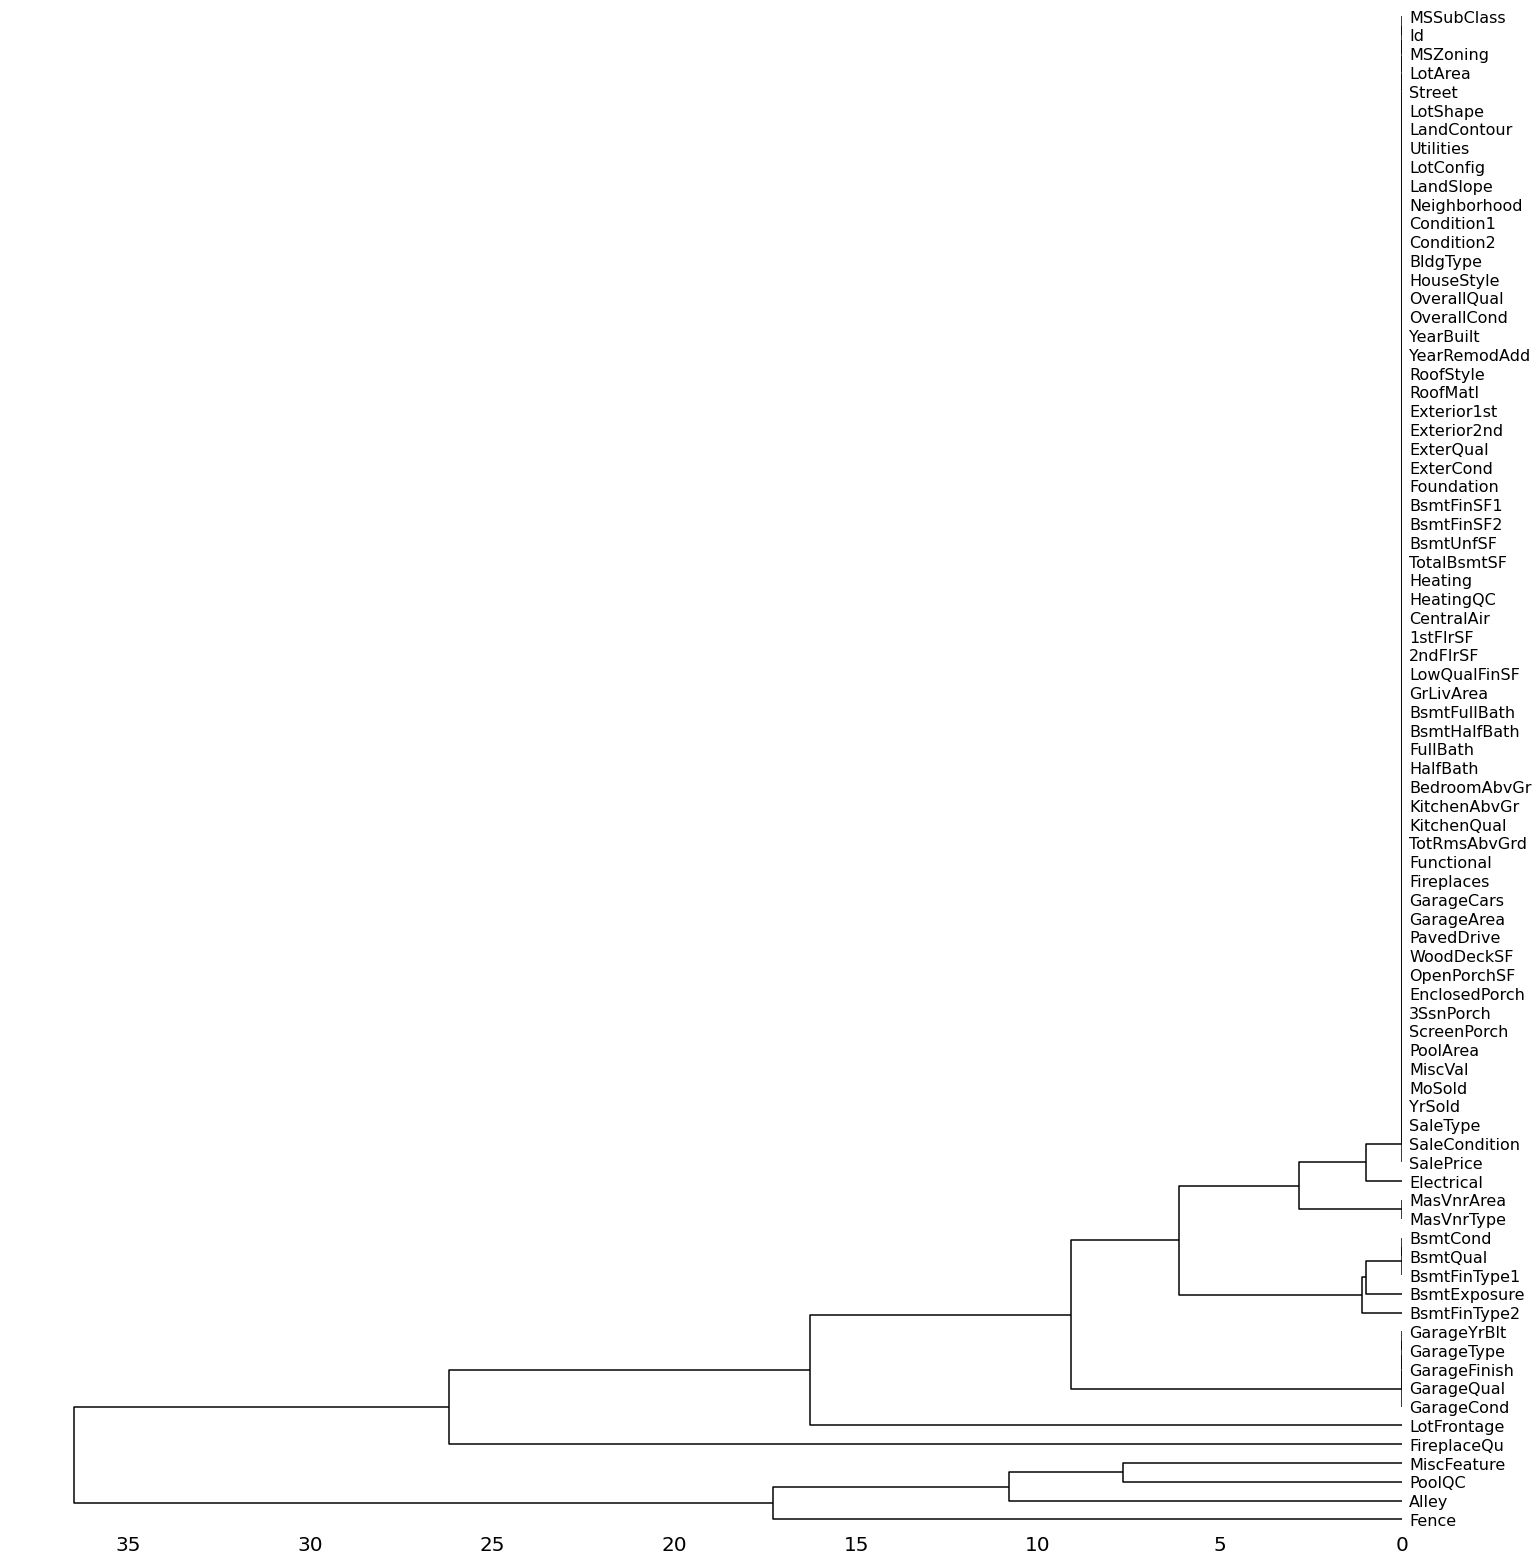

In [35]:
msno.dendrogram(train)

 ### Missing Value Analysis 
 
We will first check the percentage of missing values present in each feature

In [57]:
data = pd.read_csv("./Files/house-prices-advanced-regression-techniques/train.csv")
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % of Missing Values')

LotFrontage 0.1774  % of Missing Values
Alley 0.9377  % of Missing Values
MasVnrType 0.0055  % of Missing Values
MasVnrArea 0.0055  % of Missing Values
BsmtQual 0.0253  % of Missing Values
BsmtCond 0.0253  % of Missing Values
BsmtExposure 0.026  % of Missing Values
BsmtFinType1 0.0253  % of Missing Values
BsmtFinType2 0.026  % of Missing Values
FireplaceQu 0.4726  % of Missing Values
GarageType 0.0555  % of Missing Values
GarageYrBlt 0.0555  % of Missing Values
GarageFinish 0.0555  % of Missing Values
GarageQual 0.0555  % of Missing Values
GarageCond 0.0555  % of Missing Values
PoolQC 0.9952  % of Missing Values
Fence 0.8075  % of Missing Values
MiscFeature 0.963  % of Missing Values


#### Now let us plot with the features with missing values  vs Sales Price to find some insights about the data

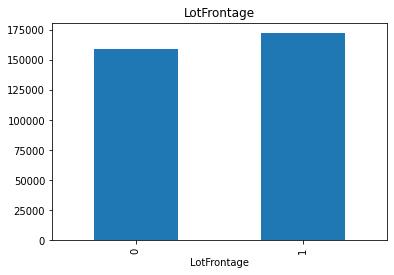

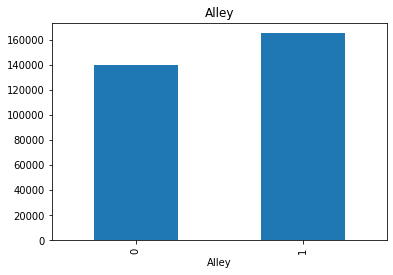

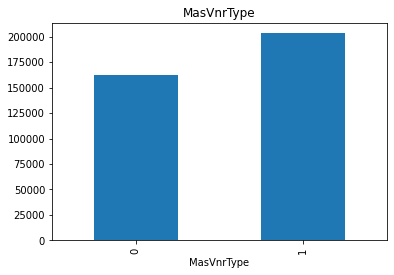

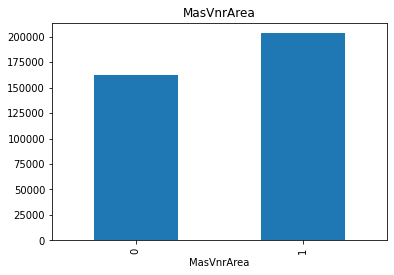

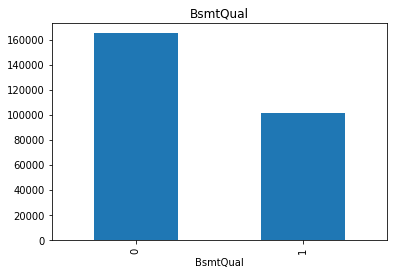

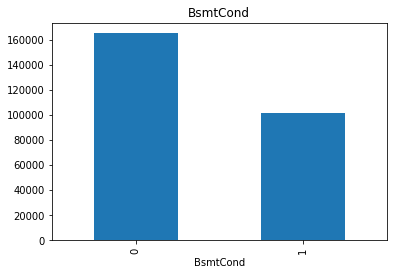

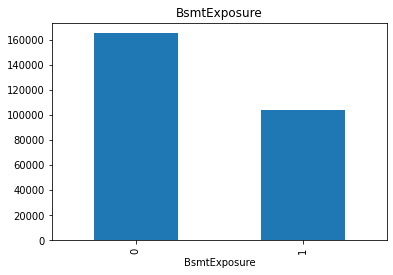

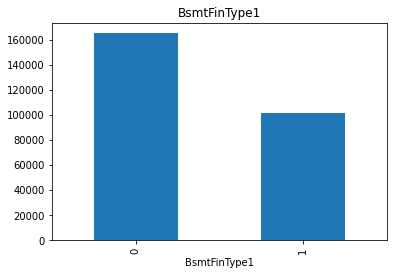

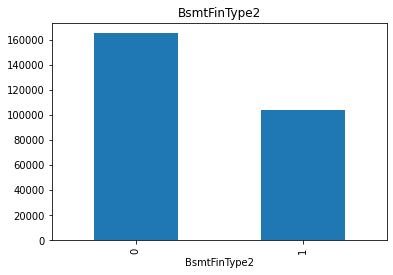

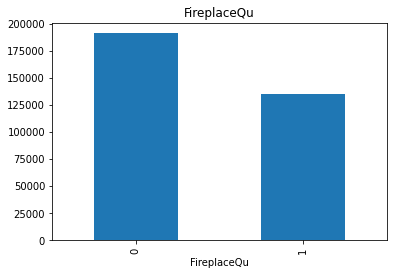

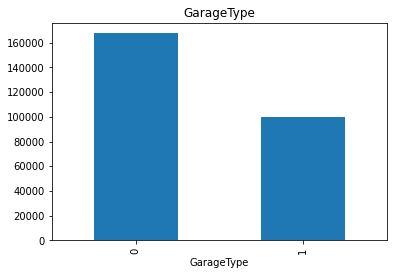

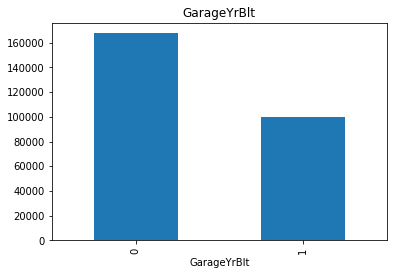

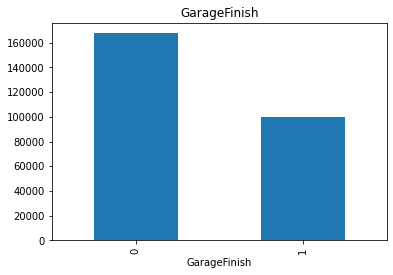

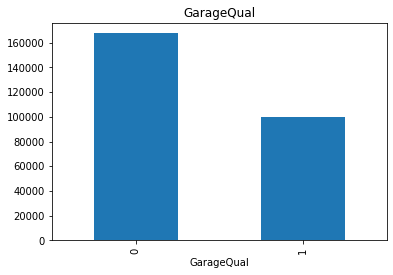

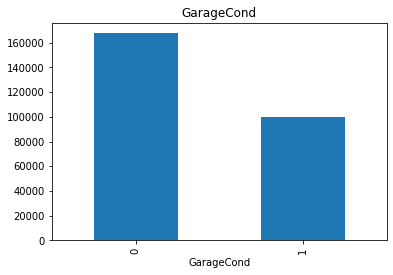

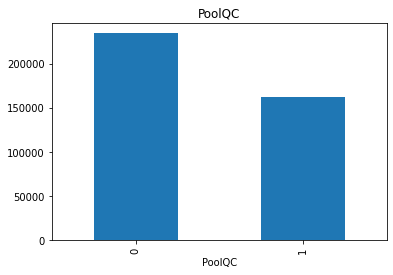

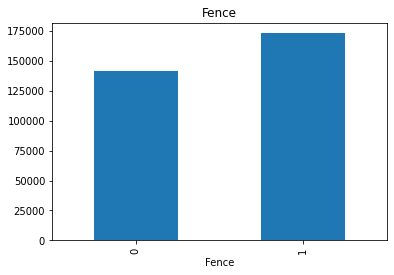

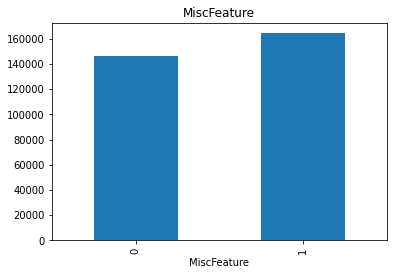

In [58]:
for feature in features_with_na:
    dataset = data.copy()
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)
     # Calculate the mean of SalePrice where the information is missing or present
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

 #### Numeric Features

In [59]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'
missing_data.head(20)

Total Missing Count  % of Total Observations
 Numeric Feature                                              
LotFrontage                       259                 0.177397
GarageYrBlt                        81                 0.055479
MasVnrArea                          8                 0.005479
BsmtFinSF1                          0                 0.000000
LowQualFinSF                        0                 0.000000
2ndFlrSF                            0                 0.000000
1stFlrSF                            0                 0.000000
TotalBsmtSF                         0                 0.000000
BsmtUnfSF                           0                 0.000000
BsmtFinSF2                          0                 0.000000
SalePrice                           0                 0.000000
BsmtFullBath                        0                 0.000000
YearRemodAdd                        0                 0.000000
YearBuilt                           0                 0.000000
OverallCond                         0                 0.000000
OverallQual                         0                 0.000000
LotArea                             0                 0.000000
MSSubClass                          0                 0.000000
GrLivArea                           0                 0.000000
BsmtHalfBath                        0                 0.000000

#### Missing values for all numeric features in Bar chart Representation

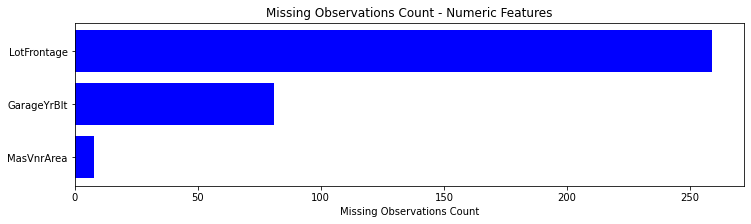

In [60]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

### Categorical Features
Let us look at the missing values in categorical features in detail

In [61]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

Total Missing Count   % of Total Observations
Feature                                                    
PoolQC                       1453                  0.995205
MiscFeature                  1406                  0.963014
Alley                        1369                  0.937671
Fence                        1179                  0.807534
FireplaceQu                   690                  0.472603
GarageCond                     81                  0.055479
GarageQual                     81                  0.055479
GarageFinish                   81                  0.055479
GarageType                     81                  0.055479
BsmtFinType2                   38                  0.026027
BsmtExposure                   38                  0.026027
BsmtFinType1                   37                  0.025342
BsmtQual                       37                  0.025342
BsmtCond                       37                  0.025342
MasVnrType                      8                  0.005479
Electrical                      1                  0.000685
Condition2                      0                  0.000000
Condition1                      0                  0.000000
Neighborhood                    0                  0.000000
LandSlope                       0                  0.000000

#### Missing values for  Categorical features in Bar chart Representation

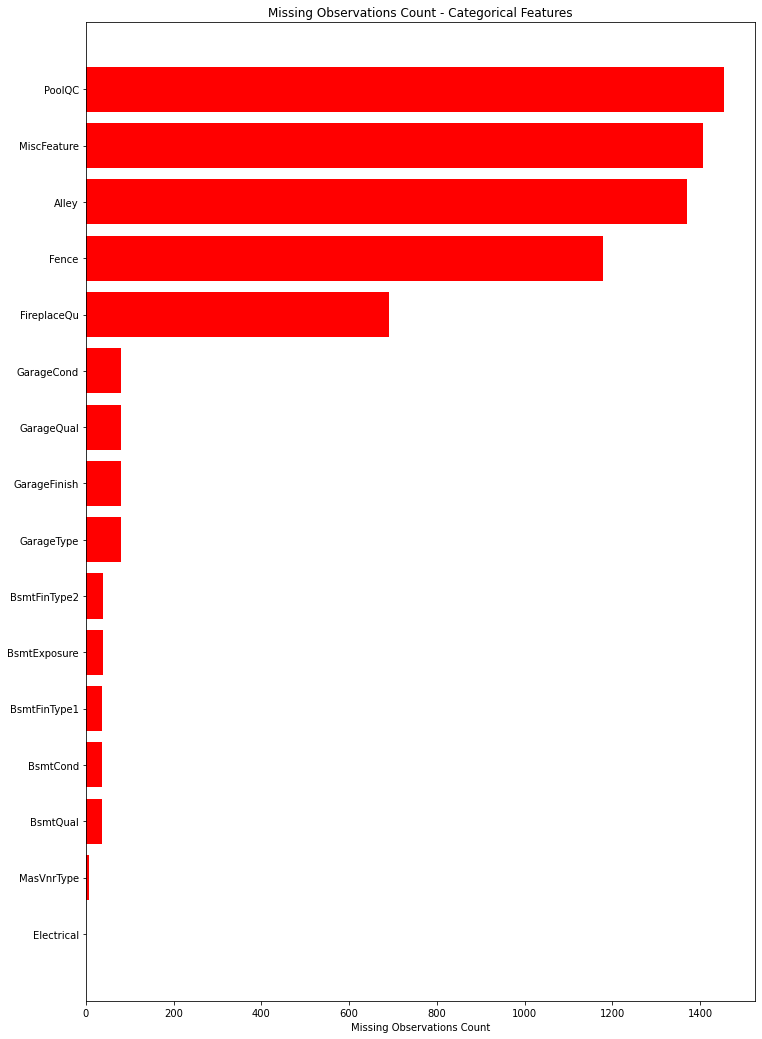

In [62]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

### Categorical Feature Exploration

Let us look at the unique values in categorical features in both train and test dataframes in detail

In [63]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 
for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Features in test set 'MSZoning' has '5' unique categories
Features in test set 'Street' has '2' unique categories
Features in test set 'Alley' has '2' unique categories
Features in test set 'LotShape' has '4' unique categories
Features in test set 'LandContour' has '4' unique categories
Features in test set 'Utilities' has '1' unique categories
Features in test set 'LotConfig' has '5' unique categories
Features in test set 'LandSlope' has '3' unique categories
Features in test set 'Neighborhood' has '25' unique categories
Features in test set 'Condition1' has '9' unique categories
Features in test set 'Condition2' has '5' unique categories
Features in test set 'BldgType' has '5' unique categories
Features in test set 'HouseStyle' has '7' unique categories
Features in test set 'RoofStyle' has '6' unique categories
Features in test set 'RoofMatl' has '4' unique categories
Features in test set 'Exterior1st' has '13' unique categories
Features in test set 'Exterior2nd' has '15' unique cate

### Outliers:

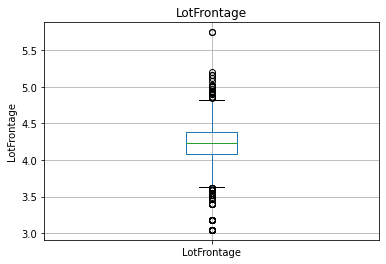

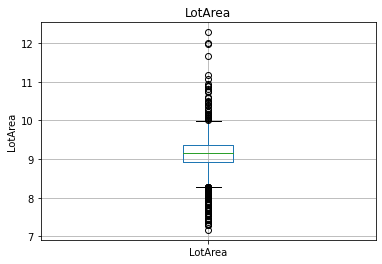

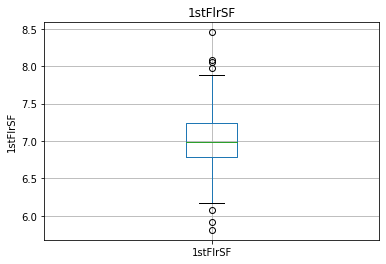

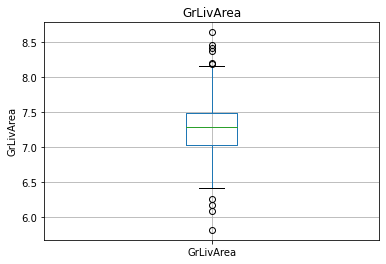

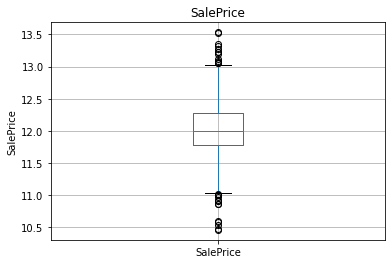

In [64]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()